### WHAT LEARNT FROM SECOND CODE:

-   I have understood the model will anyway give you good accuracy if you use more reasonable number of kernels for MNIST dataset, i have reached 99.4 in 12th epochs itself.
-   Also the model will give you good accuracy if you increase the number of epochs.

### MY STRATEGY AND IMPROVEMENTS :

-  Reducing number of channels - parameters also decreased.
-  Using parameters less than 20k.
-  Use dropout, so that it regularize the model and it will perform well on validation images also.

### Target 

Reach validation accuracy more than **99.4 with less than 20k parameters** , Should not use any learning rate schedular.

    -  ACHIEVED 99.40 in 33rd EPOCH.

#### TOOLS USED AND OBSERVATIONS 

-   I have just used the same pattern from SECOND code but used 32 channnels instead of 128
-  Used Batch Normalization, Used Dropout, No Learning rate schedular.
-  I have used only 19,168 parameters.
-  Using batch size = 64, and the Training accuracies are clearly increasing from 84.7 to 99.2.
-   I have ran for 50 epochs and the validation accuracy reached the **MAXIMUM OF 99.410 in 39th epoch**



In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


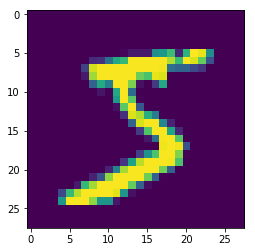

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Receptive field : 3x3 , Resolution output : 26x26x32
model.add(BatchNormalization(name='norm_1'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 3x3 , Resolution output : 26x26x10
model.add(Dropout(0.20))

model.add(Convolution2D(32, 3, 3, activation='relu')) # Receptive field : 5x5 , Resolution output : 24x24x32
model.add(BatchNormalization(name='norm_2'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 5x5 , Resolution output : 24x24x10
model.add(Dropout(0.20))

model.add(Convolution2D(32, 3, 3, activation='relu')) # Receptive field : 7x7 , Resolution output : 22x22x32
model.add(BatchNormalization(name='norm_3'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 7x7 , Resolution output : 22x22x10
model.add(Dropout(0.20))

model.add(MaxPooling2D(pool_size=(2,2))) # Receptive field : 14x14 , Resolution output : 11x11x10
model.add(Dropout(0.20))

model.add(Convolution2D(32, 3, 3, activation='relu')) # Receptive field : 16x16 , Resolution output : 9x9x32
model.add(BatchNormalization(name='norm_4'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 16x16 , Resolution output : 9x9x10
model.add(Dropout(0.20))

model.add(Convolution2D(32, 3, 3, activation='relu')) # Receptive field : 18x18 , Resolution output : 7x7x32
model.add(BatchNormalization(name='norm_5'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 18x18 , Resolution output : 7x7x10
model.add(Dropout(0.20))

model.add(Convolution2D(10, 7, 7)) # Resolution output : 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2912      
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 10)        330       
__________

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!wget https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
from clr_callback import *

--2019-05-20 13:33:04--  https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5326 (5.2K) [text/plain]
Saving to: ‘clr_callback.py.4’

clr_callback.py.4   100%[===================>]   5.20K  --.-KB/s    in 0s      

2019-05-20 13:33:04 (75.7 MB/s) - ‘clr_callback.py.4’ saved [5326/5326]



In [0]:
filepath="/content/gdrive/My Drive/Raajesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 274us/step - loss: 0.3902 - acc: 0.8735 - val_loss: 0.1097 - val_acc: 0.9654

Epoch 00001: val_acc improved from -inf to 0.96540, saving model to /content/gdrive/My Drive/Raajesh-01-0.97.hdf5
Epoch 2/50
60000/60000 [==============================] - 12s 206us/step - loss: 0.1082 - acc: 0.9655 - val_loss: 0.0915 - val_acc: 0.9709

Epoch 00002: val_acc improved from 0.96540 to 0.97090, saving model to /content/gdrive/My Drive/Raajesh-02-0.97.hdf5
Epoch 3/50
60000/60000 [==============================] - 12s 207us/step - loss: 0.0821 - acc: 0.9743 - val_loss: 0.0459 - val_acc: 0.9858

Epoch 00003: val_acc improved from 0.97090 to 0.98580, saving model to /content/gdrive/My Drive/Raajesh-03-0.99.hdf5
Epoch 4/50
60000/60000 [==============================] - 12s 207us/step - loss: 0.0722 - acc: 0.9771 - val_loss: 0.0458 - val_acc: 0.

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-33-0.99.hdf5')

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.021337284205295147, 0.994]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.16869177e-12 1.48245791e-11 5.92477001e-08 2.40826772e-08
  1.41434703e-15 3.02431205e-11 1.47983907e-22 9.99999762e-01
  2.18623774e-12 1.40776308e-07]
 [2.11025561e-08 1.51019412e-06 9.99998450e-01 3.47097462e-10
  1.11341825e-09 1.03915346e-12 4.28200799e-08 4.77725281e-12
  1.34769362e-09 1.42306670e-11]
 [6.64228894e-09 9.99986649e-01 1.13656342e-05 4.19584040e-07
  5.98139707e-08 2.40443029e-07 1.62673963e-08 1.06478160e-06
  1.34206147e-07 2.48064591e-09]
 [9.96953368e-01 3.82317702e-12 1.74648392e-07 5.48503408e-07
  8.93150087e-09 1.71537340e-05 2.97308294e-03 2.15610445e-08
  2.75567418e-05 2.80849526e-05]
 [8.35992039e-12 7.53178908e-11 3.54078850e-10 1.87579385e-15
  9.99999881e-01 4.51665140e-14 2.39867397e-11 1.39305486e-11
  7.45652151e-10 8.26205238e-08]
 [1.19331700e-08 9.99983072e-01 1.14280556e-05 7.03959984e-08
  1.90361092e-07 8.27324609e-09 8.52524362e-09 4.95903669e-06
  3.40868439e-07 6.44126974e-09]
 [6.59981007e-17 3.45628592e-07 1.45382026e-10 3.31089323e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored